In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [3]:
import pandas as pd

# Load training data
train_data = pd.read_csv("train_data.txt", sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'], engine='python')
display(train_data.head())
print(train_data.shape)

# Load test data
test_data = pd.read_csv("test_data.txt", sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'], engine='python')
display(test_data.head())
print(test_data.shape)

# Load test solution data
test_solution_data = pd.read_csv("test_data_solution.txt", sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'], engine='python')
display(test_solution_data.head())
print(test_solution_data.shape)


,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


(17552, 4)


,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",NaN
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",NaN
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,NaN
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",NaN
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,NaN


(19662, 4)


,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


(19302, 4)


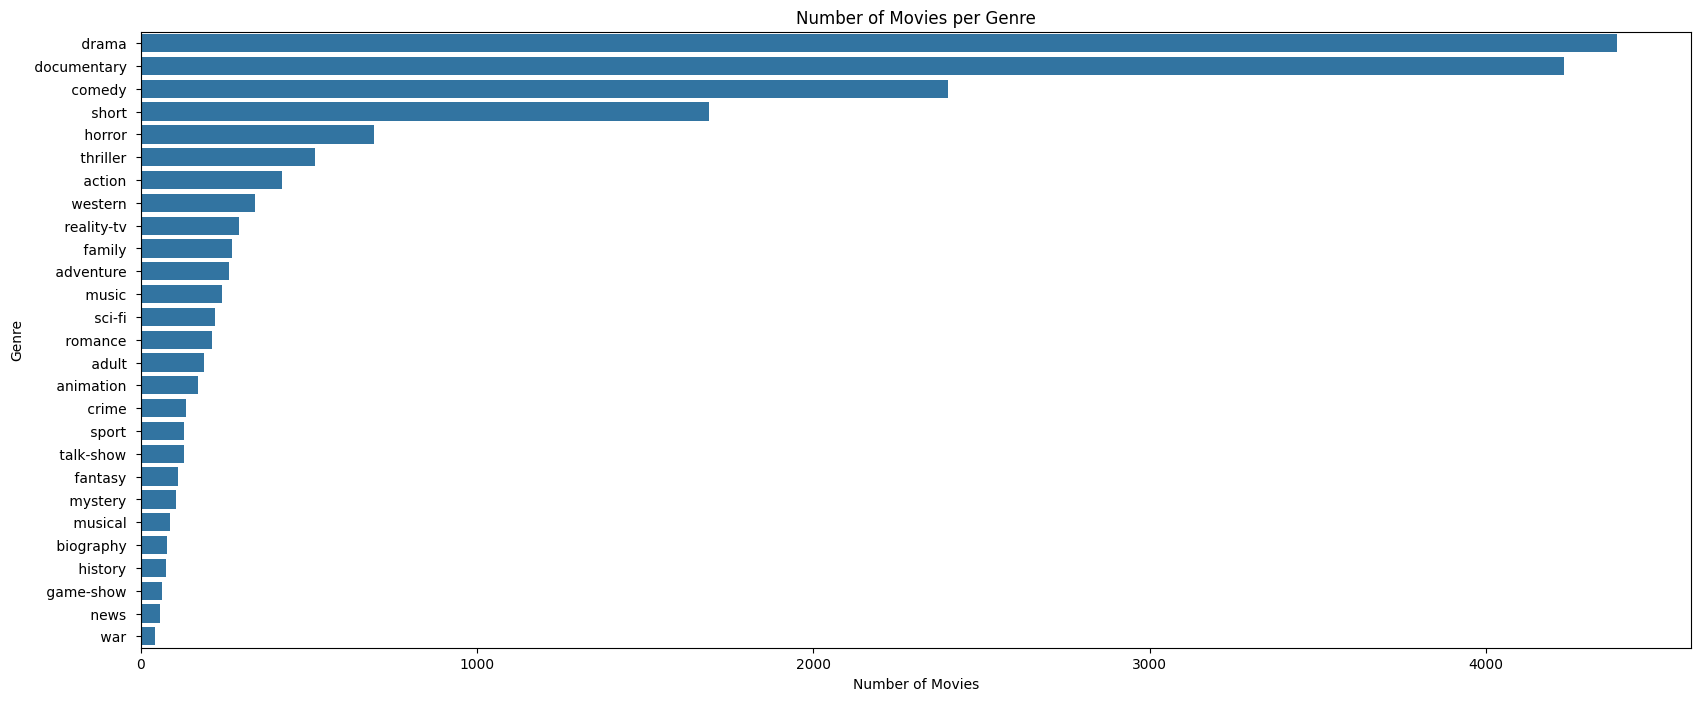

In [4]:
plt.figure(figsize=(20,8))
sns.countplot(y=train_data['GENRE'], order = train_data['GENRE'].value_counts().index)
plt.title('Number of Movies per Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

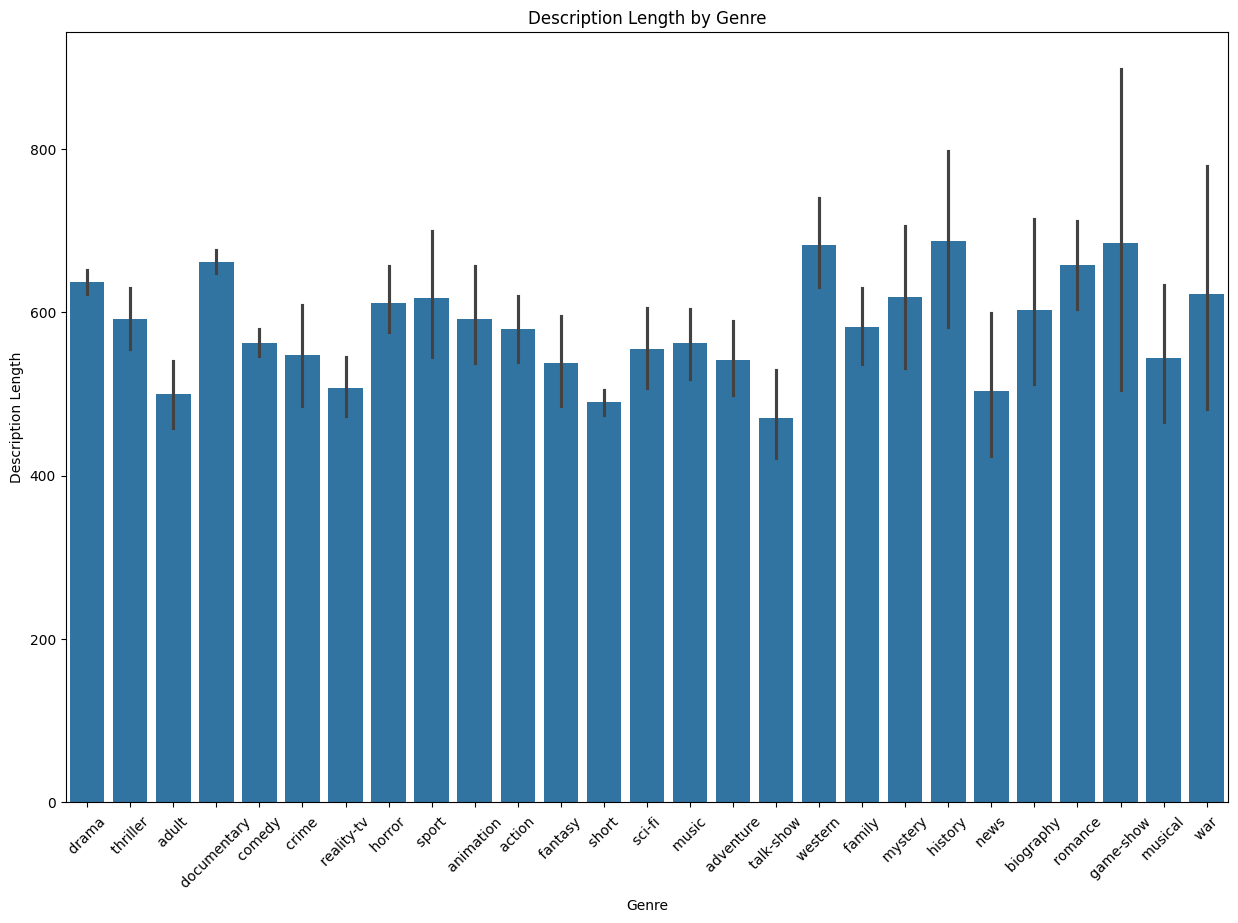

In [5]:
train_data['DESCRIPTION_length'] = train_data['DESCRIPTION'].apply(len)
plt.figure(figsize=(15, 10))
sns.barplot(x='GENRE', y='DESCRIPTION_length', data=train_data)
plt.title('Description Length by Genre')
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Description Length')
plt.show()

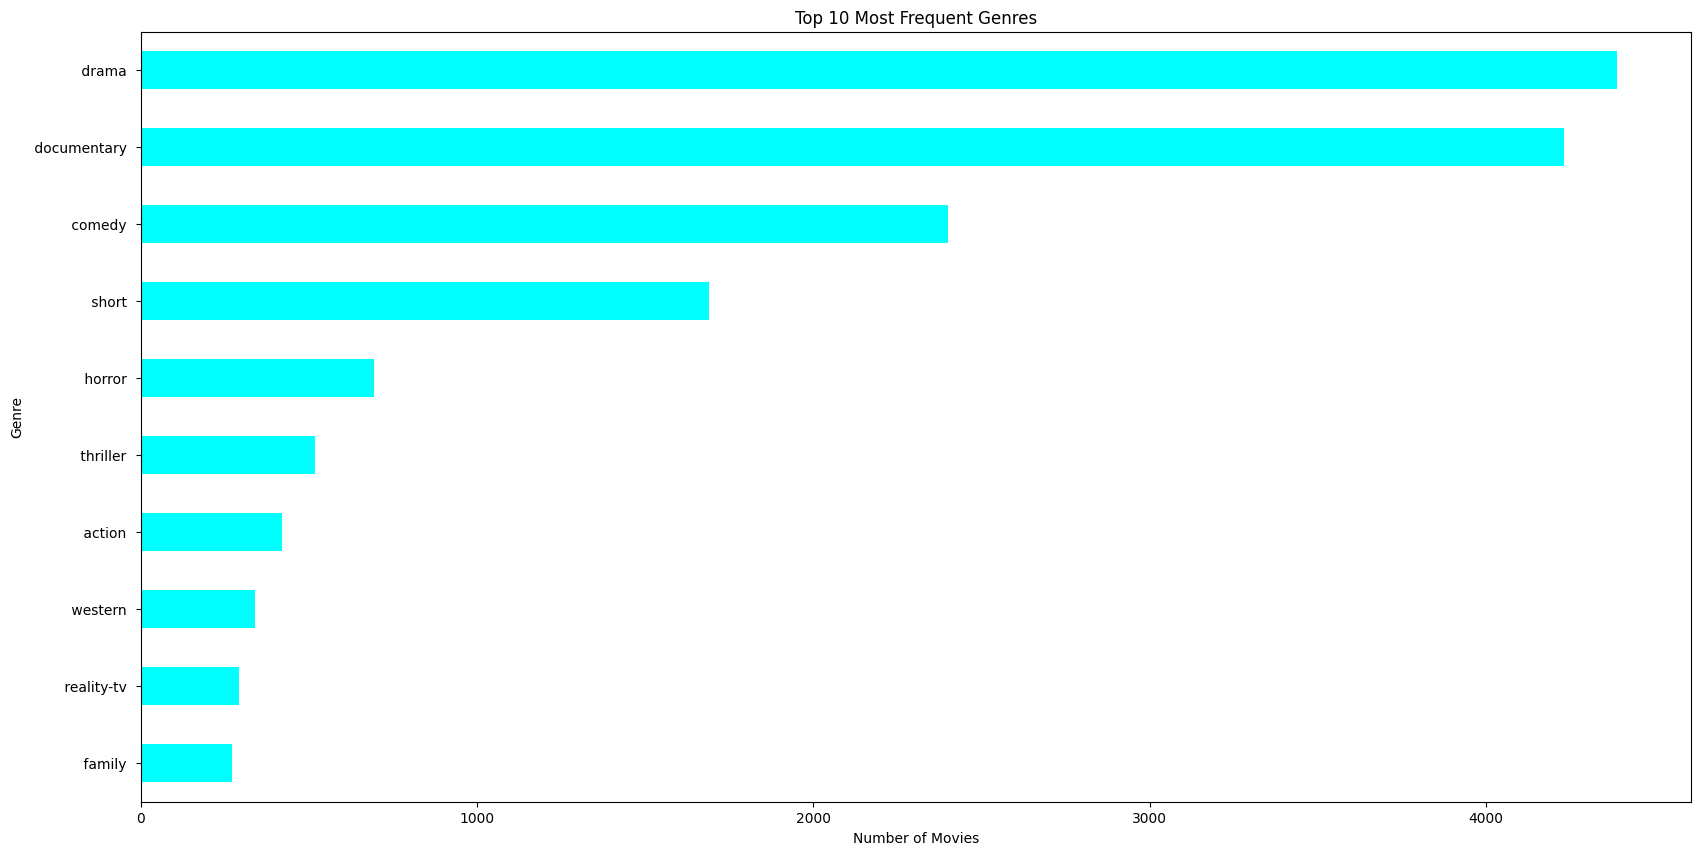

In [6]:
top_genres = train_data['GENRE'].value_counts().head(10)

plt.figure(figsize=(20, 10))
top_genres.plot(kind='barh', color='cyan')
plt.title('Top 10 Most Frequent Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.gca().invert_yaxis()  # Invert y-axis to have the genre with the most movies at the top
plt.show()

In [7]:
# Handle any potential missing values
train_data['DESCRIPTION'].fillna("", inplace=True)
test_data['DESCRIPTION'].fillna("", inplace=True)

t_v = TfidfVectorizer(stop_words='english', max_features=100000)
X_train = t_v.fit_transform(train_data['DESCRIPTION'])
X_test = t_v.transform(test_data['DESCRIPTION'])

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['GENRE'])
y_test = label_encoder.transform(test_solution_data['GENRE'])

/tmp/ipython-input-7-3123445997.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['DESCRIPTION'].fillna("", inplace=True)
/tmp/ipython-input-7-3123445997.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [8]:
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

clf = LinearSVC()
clf.fit(X_train_sub, y_train_sub)

y_val_pred = clf.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

Validation Accuracy: 0.5306180575334662
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.24      0.32        96
           1       0.70      0.20      0.31        35
           2       0.52      0.19      0.28        58
           3       0.38      0.10      0.15        31
           4       0.00      0.00      0.00        15
           5       0.47      0.56      0.51       464
           6       0.00      0.00      0.00        32
           7       0.63      0.83      0.72       846
           8       0.51      0.67      0.58       893
           9       0.25      0.07      0.11        45
          10       0.00      0.00      0.00        25
          11       0.71      0.42      0.53        12
          12       0.00      0.00      0.00        12
          13       0.61      0.44      0.51       148
          14       0.55      0.33      0.42        48
          15       0.00      0.00      0.00        14
      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [13]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

# Load data
train_data = pd.read_csv("train_data.txt", sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'], engine='python')
test_data = pd.read_csv("test_data.txt", sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'], engine='python')
test_solution_data = pd.read_csv("test_data_solution.txt", sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'], engine='python')

# Handle missing values in DESCRIPTION
train_data["DESCRIPTION"] = train_data["DESCRIPTION"].fillna("")
test_data["DESCRIPTION"] = test_data["DESCRIPTION"].fillna("")
test_solution_data["DESCRIPTION"] = test_solution_data["DESCRIPTION"].fillna("")

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_data["DESCRIPTION"])
X_test = vectorizer.transform(test_data["DESCRIPTION"])

# Label encoding
le = LabelEncoder()
y_train = le.fit_transform(train_data["GENRE"])
y_test = le.transform(test_solution_data["GENRE"])

# Model training
clf = LinearSVC()
clf.fit(X_train, y_train)

# Prediction
y_pred = clf.predict(X_test)

# Evaluation
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


Test Accuracy: 0.09357933579335793
Classification Report:
                precision    recall  f1-score   support

      action        0.00      0.00      0.00      1314
       adult        0.00      0.00      0.00       590
   adventure        0.00      0.00      0.00       775
   animation        0.00      0.00      0.00       498
   biography        0.00      0.00      0.00       264
      comedy        0.00      0.00      0.00      7446
       crime        0.00      0.00      0.00       505
 documentary        0.00      0.00      0.00     13096
       drama        0.00      0.00      0.00     13612
      family        0.00      0.00      0.00       783
     fantasy        0.00      0.00      0.00       322
   game-show        0.00      0.00      0.00       193
     history        0.00      0.00      0.00       243
      horror        0.00      0.00      0.00      2204
       music        0.00      0.00      0.00       731
     musical        0.00      0.00      0.00       276
     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [14]:
from sklearn.naive_bayes import MultinomialNB
Mnb_classifier = MultinomialNB()
Mnb_classifier.fit(X_train, y_train)

MultinomialNB()

In [15]:

Mnb_classifier.predict(X_test)

array([8, 8, 8, ..., 8, 8, 8])

In [16]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(max_iter=500)
lr_classifier.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [17]:
lr_classifier.predict(X_test)

array([21, 21, 21, ..., 21, 21, 21])

In [ ]:
#A group of superheroes team up to save the world from an alien invasion.
#A hilarious journey of three friends on a road trip full of funny events.
#A poor man struggles to rise above poverty in modern society.
#A spy is sent on a mission to stop a global terrorist threat.
#"A movie where police chases the criminal and shoots him"

In [26]:
def predict_movie(description):
    # Use the same vectorizer and label encoder from training
    tfidf_input = vectorizer.transform([description])
    predicted_label = clf.predict(tfidf_input)
    return le.inverse_transform(predicted_label)[0]

# Sample inputs
sample_descr_for_movie = "A spy is sent on a mission to stop a global terrorist threat"
sample_descr_for_movie1 = "A movie where police chases the criminal and shoots him"

print(predict_movie(sample_descr_for_movie))
print(predict_movie(sample_descr_for_movie1))


 action 
 drama 
